In [1]:
import pandas as pd

In [10]:
df = pd.read_csv('socialmedia.csv')

In [ ]:
df.head()

,User ID,Username,Platform,Post ID,Post Text,Post Timestamp,Likes/Reactions,Comments,Shares/Retweets,Hashtags,...,Account Creation Date,Account Verification,User Engagement,User Interactions,User Activity,User Bio,User Description 1,User Description 2,Server Post,User Language
0,101,@adventureSeeker,Instagram,82036,"""Experiencing the thrill of a lifetime! #Adven...",30-07-2023 14:45,1500,250,120,#AdventureTime,...,10-05-2019,Verified,1870,15700,3 posts per week,Adventure enthusiast,Nature lover,Seeker of wanderlust ??,"California, USA",English
1,215,@foodieTraveler,Twitter,12463,"""Indulging in local delicacies! #FoodieTravels""",30-07-2023 19:30,850,70,50,#FoodieTravels,...,15-09-2017,Not verified,970,8300,5 posts per week,Culinary explorer,Street food connoisseur,Travel addict ??,"London, UK",English
2,303,@wellnessJourney,Facebook,45982,"""Finding peace and balance in nature!",30-07-2023 08:15,680,80,40,#WellnessJourney,...,02-03-2020,Not verified,800,6200,2 posts per week,Wellness enthusiast,Yogi in training,Mindfulness advocate,"San Francisco, USA",English
3,404,@fitnessFreak,Instagram,16572,"""Pushing my limits in the gym!",30-07-2023 12:30,1850,350,180,#FitnessGoals,...,12-08-2016,Verified,2380,32750,4 posts per week,Fitness enthusiast,Health is wealth,Workout addict,"Los Angeles, USA",English
4,521,@foodExplorer,Twitter,75589,"""Discovering unique flavors around the world!",30-07-2023 16:20,950,80,60,#Foodies,...,28-02-2018,Not verified,1090,9080,3 posts per week,Culinary adventurer,Gastronomic traveler,Bon app?it!,"Paris, France",English


In [ ]:
df.isnull().sum()

User ID                   0
Username                  0
Platform                  0
Post ID                   0
Post Text                 0
Post Timestamp            0
Likes/Reactions           0
Comments                  0
Shares/Retweets           0
Hashtags                  0
Mentions                 39
Media Type                0
Media URL                14
Post URL                  0
Location                  0
Privacy Settings          0
User Followers            0
User Following            0
Account Creation Date     0
Account Verification      0
User Engagement           0
User Interactions         0
User Activity             0
User Bio                  0
User Description 1        0
User Description 2        0
Server Post               0
User Language             0
dtype: int64

In [14]:
# Group by platform and calculate mean likes and comments
mean_values = df.groupby('Platform')[['Likes/Reactions', 'Comments']].mean()

# Count posts per platform
post_counts = df['Platform'].value_counts()

# Combine results
summary = pd.concat([post_counts, mean_values], axis=1)
summary.columns = ['Post Count', 'Average Likes', 'Average Comments']

print(summary)


           Post Count  Average Likes  Average Comments
Platform                                              
Instagram          14    1250.000000        198.571429
Twitter            10     776.000000         87.000000
Facebook            7     951.428571        117.142857
Spotify             2     855.000000        100.000000
YouTube             2     630.000000         80.000000
Twitch              2    1000.000000        135.000000
Goodreads           2     415.000000         50.000000


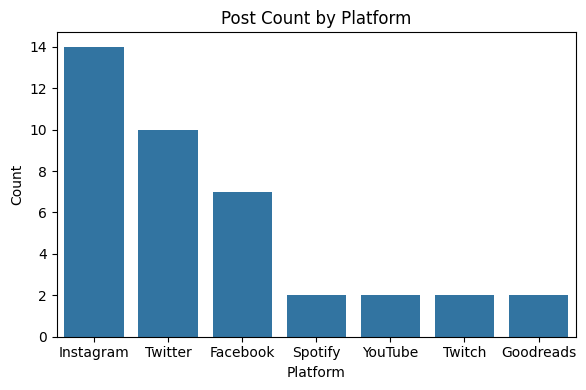

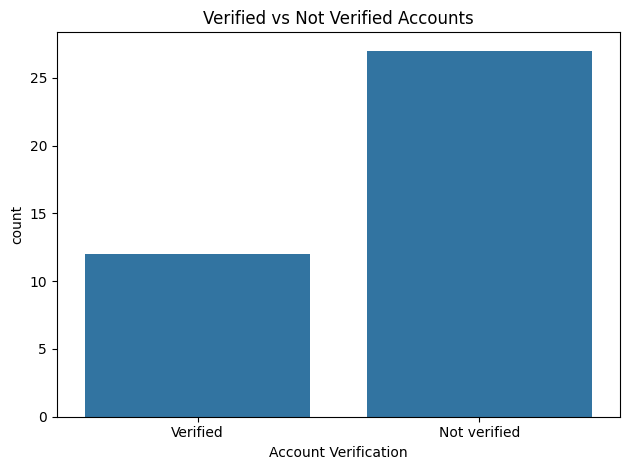

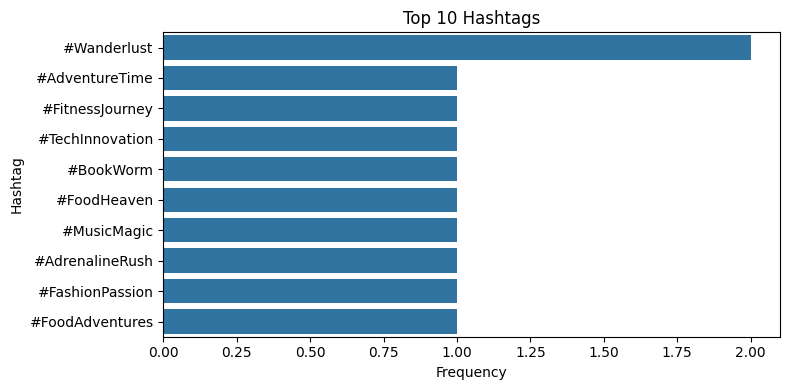

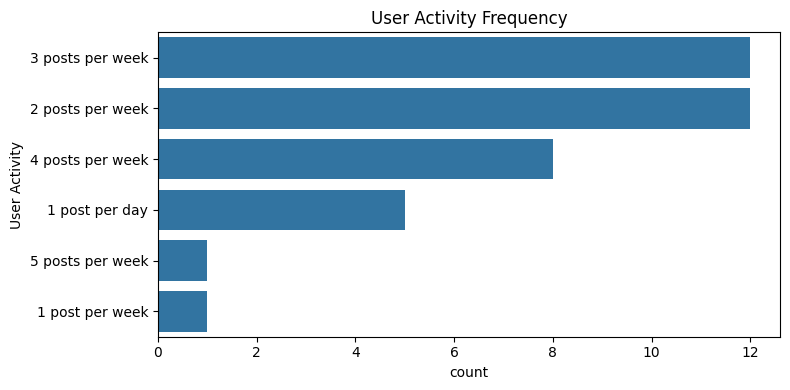

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Distribution of platforms
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Platform', order=df['Platform'].value_counts().index)
plt.title('Post Count by Platform')
plt.ylabel('Count')
plt.xlabel('Platform')
plt.tight_layout()
plt.show()

# Account Verification Count
sns.countplot(data=df, x='Account Verification')
plt.title('Verified vs Not Verified Accounts')
plt.tight_layout()
plt.show()

# Top Hashtags
df['Hashtags'] = df['Hashtags'].astype(str)
hashtags = df['Hashtags'].str.extractall(r'(#\w+)')[0].value_counts().head(10)

plt.figure(figsize=(8, 4))
sns.barplot(x=hashtags.values, y=hashtags.index)
plt.title('Top 10 Hashtags')
plt.xlabel('Frequency')
plt.ylabel('Hashtag')
plt.tight_layout()
plt.show()

# User Activity Frequency
plt.figure(figsize=(8, 4))
sns.countplot(y='User Activity', data=df, order=df['User Activity'].value_counts().index)
plt.title('User Activity Frequency')
plt.tight_layout()
plt.show()



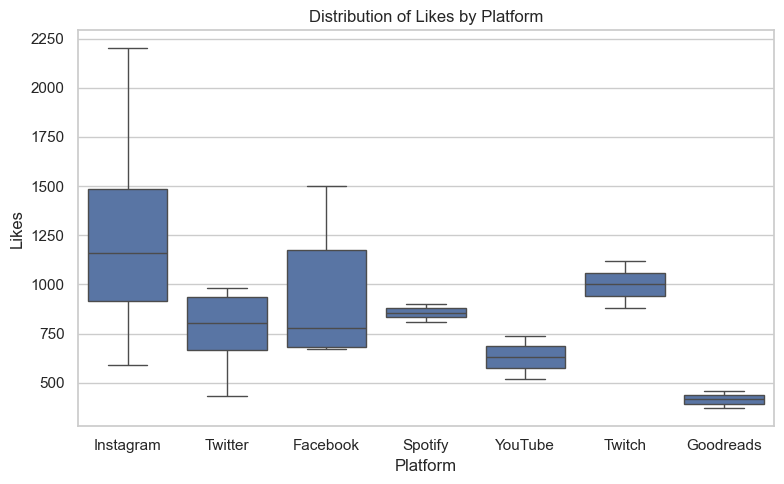

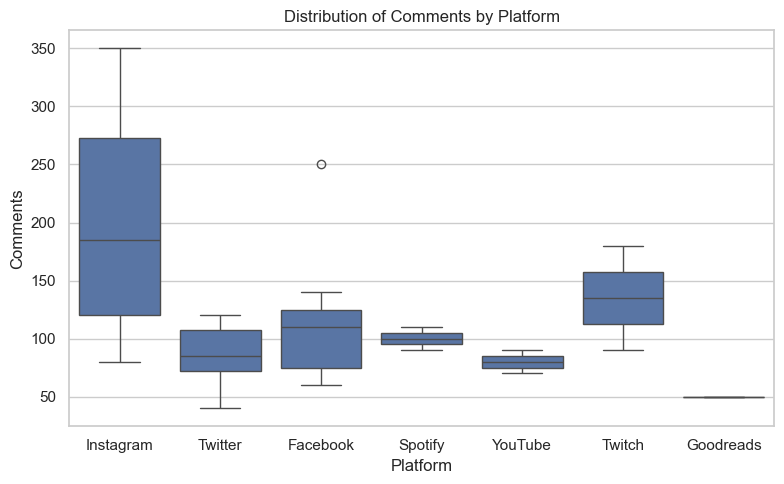

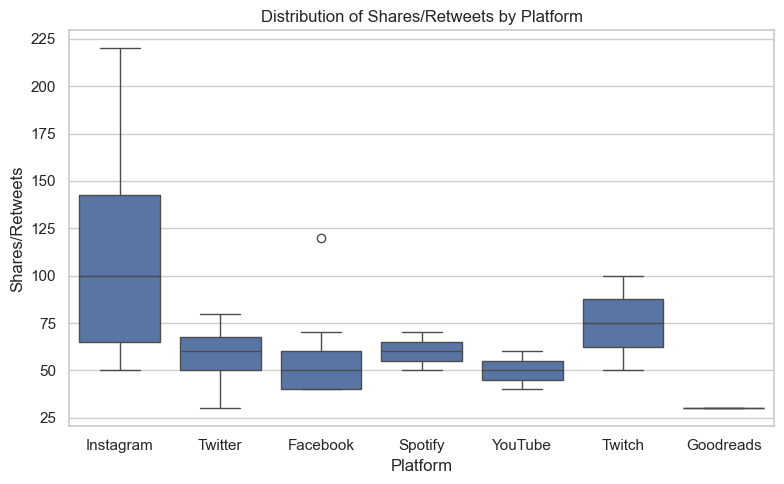

In [19]:
# Set plot style
sns.set(style="whitegrid")

# Boxplot for Likes per Platform
plt.figure(figsize=(8, 5))
sns.boxplot(x='Platform', y='Likes/Reactions', data=df)
plt.title('Distribution of Likes by Platform')
plt.ylabel('Likes')
plt.xlabel('Platform')
plt.tight_layout()
plt.show()

# Boxplot for Comments per Platform
plt.figure(figsize=(8, 5))
sns.boxplot(x='Platform', y='Comments', data=df)
plt.title('Distribution of Comments by Platform')
plt.ylabel('Comments')
plt.xlabel('Platform')
plt.tight_layout()
plt.show()

# Boxplot for Shares/Retweets per Platform
plt.figure(figsize=(8, 5))
sns.boxplot(x='Platform', y='Shares/Retweets', data=df)
plt.title('Distribution of Shares/Retweets by Platform')
plt.ylabel('Shares/Retweets')
plt.xlabel('Platform')
plt.tight_layout()
plt.show()